In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff


#Text Preprocessing libraries
import nltk
nltk.download('stopwords')
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
import contractions
from nltk.stem import SnowballStemmer


from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline

import xgboost as xgb

[nltk_data] Downloading package stopwords to /home/lenovo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/lenovo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/lenovo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
primary_blue = "#496595"
primary_red = "#eb345b"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

In [7]:
df = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [9]:
print("-------Shape of data--------")
df.shape

-------Shape of data--------


(28619, 3)

In [10]:
#Copying the data 
df_copy = df.copy()

In [11]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [12]:
df['source_of_text'] = df['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  source_of_text  
0  https://www.theonion.com/thirtysomething-scien...        theonion  
1  https://www.huffingtonpost.com/entry/donna-edw...  huffingtonpost  
2  https://www.huffingtonpost.com/entry/eat-your-...  huffingtonpost  
3  https://local.theonion.com/inclement-weather-p...        theonion  
4  https://www.theonion.com/mother-comes-pretty-c...        theonion

In [13]:
df = df.drop(['article_link'],axis = 1)

In [14]:
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

   source_of_text  
0        theonion  
1  huffingtonpost  
2  huffingtonpost  
3        theonion  
4        theonion

In [15]:
px.pie(df,names='is_sarcastic',labels=['Sarcastic','Acclaim'],title='Sarcasam Vs Acclaim',template='plotly_dark')

In [16]:
plt.style.use('ggplot')

Text(0.5, 0, 'Target')

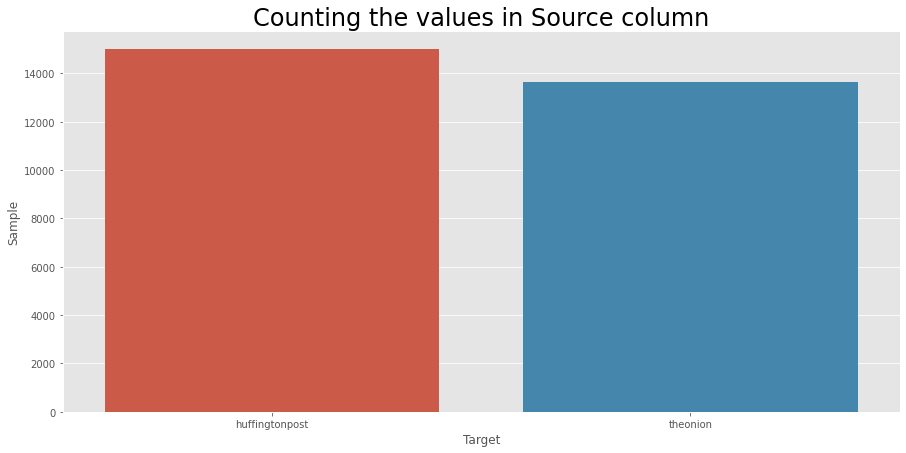

In [17]:
target_counts=df['source_of_text'].value_counts()
plt.figure(figsize = (15,7))
sns.barplot(y=target_counts,x=target_counts.index)
plt.title("Counting the values in Source column",fontsize = 24)
plt.ylabel('Sample')
plt.xlabel('Target')

In [18]:
df['message_len'] = df['headline'].apply(lambda x: len(x.split(' ')))
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

   source_of_text  message_len  
0        theonion            8  
1  huffingtonpost           13  
2  huffingtonpost            7  
3        theonion            8  
4        theonion            9

In [21]:
sarcastic_df = df[df['is_sarcastic'] == 1]['message_len'].value_counts().sort_index()
not_sarcastic_df = df[df['is_sarcastic'] == 0]['message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sarcastic_df.index,
    y=sarcastic_df.values,
    name='Sarcastic',
    fill='tozeroy',
    marker_color=primary_red,
))
fig.add_trace(go.Scatter(
    x=not_sarcastic_df.index,
    y=not_sarcastic_df.values,
    name='Acclaim',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Roles in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

## Preprocessing the Data

In [20]:
df['headline']=df['headline'].str.lower()
# Code to remove the Hashtags from the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
df['headline']=df['headline'].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
df['headline']=df['headline'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Code to remove all the single characters in the text
df['headline']=df['headline'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
df['headline']=df['headline'].apply(lambda x:re.sub('@[^\s]+','',x))

In [22]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['headline_clean'] = df['headline'].apply(remove_stopwords)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

   source_of_text  message_len  \
0        theonion            8   
1  huffingtonpost           13   
2  huffingtonpost            7   
3        theonion            8   
4        theonion            9   

                                      headline_clean  
0  thirtysomething scientists unveil doomsday clo...  
1  dem rep totally nails congress falling short g...  
2        eat veggies 9 deliciously different recipes  
3       inclement weather prevents liar getting work  
4  mother comes pretty close using word streaming...

In [23]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['headline_clean'].apply(lambda x: tokenization(x.lower()))
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

   source_of_text  message_len  \
0        theonion            8   
1  huffingtonpost           13   
2  huffingtonpost            7   
3        theonion            8   
4        theonion            9   

                                      headline_clean  \
0  thirtysomething scientists unveil doomsday clo...   
1  dem rep totally nails congress falling short g...   
2        eat veggies 9 deliciously different recipes   
3       inclement weather prevents liar getting work   
4  mother comes pretty close using word streaming...   

                                           tokenized  
0  [thirtysomething, scientists, unveil, doomsday...  
1  [dem, rep, totally, nails, congress, falling, ...  
2  [eat, veggies, 9, deliciously, different, reci...  
3  [inclement, weather, prevents, liar, getting, ...  
4  [mother, comes, pretty, close, using, word, st...

In [25]:
sarcastic = df[df['is_sarcastic']==1]['headline_clean']
sarcastic[:10]

0     thirtysomething scientists unveil doomsday clo...
3          inclement weather prevents liar getting work
4     mother comes pretty close using word streaming...
7     richard bransonglobal warming donation nearly ...
8     shadow government getting large meet marriott ...
14           ford develops new suv runs purely gasoline
16    area boy enters jumping touching tops doorways...
17                            area man traveling gurney
21    guard video game strict orders repeatedly pace...
25     secret service agent secret david alan grier fan
Name: headline_clean, dtype: object

In [26]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df['headline_clean'] = df['headline_clean'].apply(stemm_text)
df.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep totally nails why congress is falling ...   
2             0   eat your veggies 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word stream...   

   source_of_text  message_len  \
0        theonion            8   
1  huffingtonpost           13   
2  huffingtonpost            7   
3        theonion            8   
4        theonion            9   

                                      headline_clean  \
0  thirtysometh scientist unveil doomsday clock h...   
1  dem rep total nail congress fall short gender ...   
2                    eat veggi 9 delici differ recip   
3            inclement weather prevent liar get work   
4   mother come pretti close use word stream correct   

                                           tokenized  
0  [thirtysomething, scientists, unveil, doomsday...  
1  [dem, rep, totally, nails, congress, falling, ...  
2  [eat, veggies, 9, deliciously, different, reci...  
3  [inclement, weather, prevents, liar, getting, ...  
4  [mother, comes, pretty, close, using, word, st...

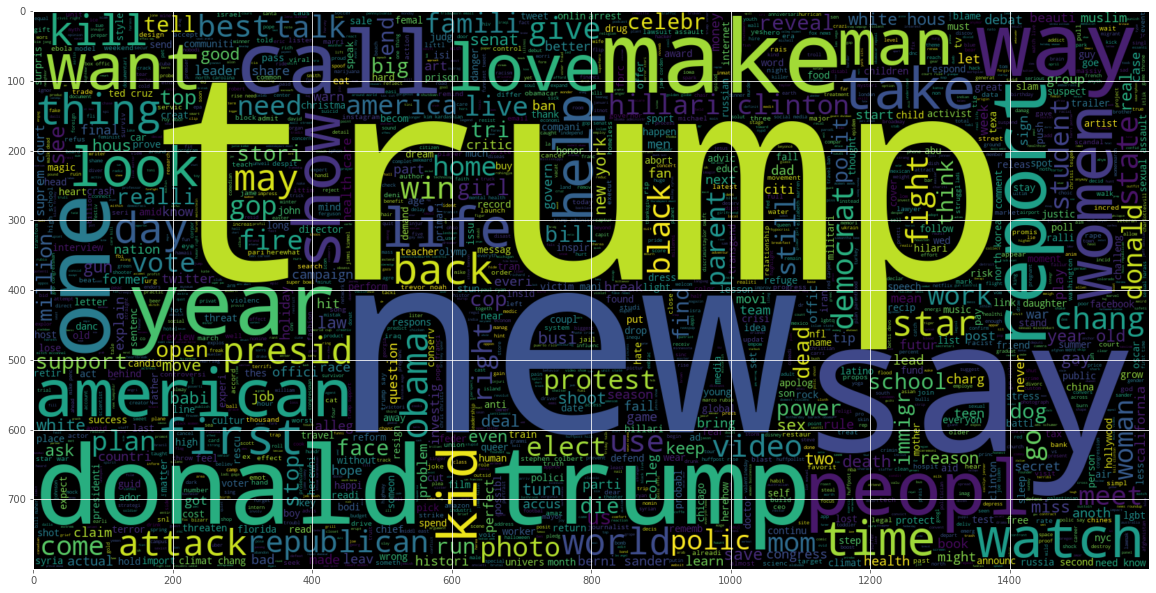

In [27]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

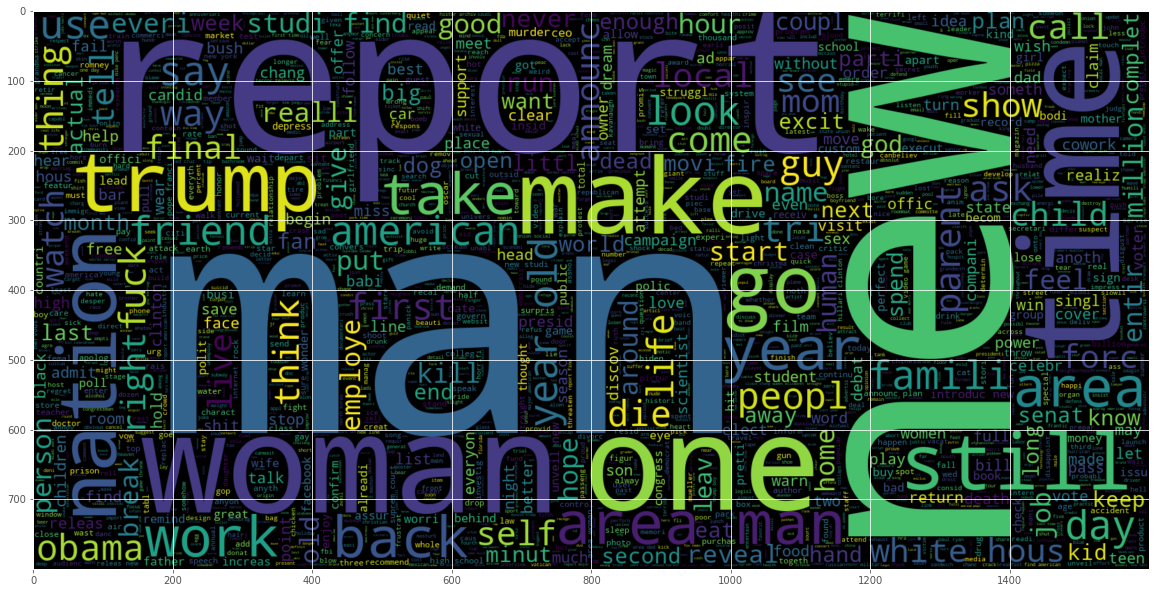

In [28]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

In [29]:
all_words=[]
for i in range(len(df['tokenized'])):
    a=df['tokenized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:100].rename_axis('Common Words').reset_index(name='count')

fig = px.treemap(common_words, path=['Common Words'], values='count',template= "plotly_dark",title='100 Most Common Words In Headline')
fig.show()

In [30]:
#Spliting it into training and testing 
X = df['headline_clean']
y = df['is_sarcastic']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

22895 22895
5724 5724


### Traditional Machine Learning Algorithms:
1. Logistic Regression
2. Naive Bayes 
3. Linear SVM
4. Decision Trees
5. Random Forest
6. XGB Classifier
7. SGD Classifier
8. ADA Boost

In [72]:
# Logistic Regression
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        multi_class='ovr',
    ))
])

from sklearn import metrics

# Fit the pipeline with the data
MODEL = pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}%'.format(metrics.accuracy_score(y_train, y_pred_train)*100))
print('Test: {}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))
a = metrics.accuracy_score(y_train, y_pred_train)*100

Train: 87.85324306617164%
Test: 78.12718378756115%


In [73]:
print(metrics.confusion_matrix(y_pred_class, y_test))

[[2422  679]
 [ 573 2050]]


In [74]:
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      3101
           1       0.75      0.78      0.77      2623

    accuracy                           0.78      5724
   macro avg       0.78      0.78      0.78      5724
weighted avg       0.78      0.78      0.78      5724



In [75]:
# Naive Bayes
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', MultinomialNB(
        
    ))
])

from sklearn import metrics

# Fit the pipeline with the data
MODEL = pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}%'.format(metrics.accuracy_score(y_train, y_pred_train)*100))
print('Test: {}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))
b = metrics.accuracy_score(y_train, y_pred_train)*100

Train: 89.9410351605154%
Test: 78.79105520614954%


In [76]:
print(metrics.confusion_matrix(y_pred_class, y_test))

[[2394  613]
 [ 601 2116]]


In [77]:
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3007
           1       0.78      0.78      0.78      2717

    accuracy                           0.79      5724
   macro avg       0.79      0.79      0.79      5724
weighted avg       0.79      0.79      0.79      5724



In [78]:
# SVM Classifier
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', SVC(
        kernel='sigmoid',
        gamma='auto',
        class_weight='balanced',
    ))
])

from sklearn import metrics

# Fit the pipeline with the data
MODEL = pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}%'.format(metrics.accuracy_score(y_train, y_pred_train)*100))
print('Test: {}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))
c = metrics.accuracy_score(y_train, y_pred_train)*100

Train: 52.369512994103516%
Test: 52.3235499650594%


In [79]:
print(metrics.confusion_matrix(y_pred_class, y_test))

[[2995 2729]
 [   0    0]]


In [80]:
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       1.00      0.52      0.69      5724
           1       0.00      0.00      0.00         0

    accuracy                           0.52      5724
   macro avg       0.50      0.26      0.34      5724
weighted avg       1.00      0.52      0.69      5724



/home/lenovo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/lenovo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/lenovo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [81]:
# Decision Tree
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', DecisionTreeClassifier(
        criterion='entropy',
        max_features='sqrt',
    ))
])

from sklearn import metrics

# Fit the pipeline with the data
MODEL = pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

# print('Train: {}%'.format(metrics.accuracy_score(y_train, y_pred_train)*100))
print('Test: {}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))
d = metrics.accuracy_score(y_test, y_pred_class)*100

Test: 68.62334032145353%


In [82]:
print(metrics.confusion_matrix(y_pred_class, y_test))

[[2138  939]
 [ 857 1790]]


In [83]:
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3077
           1       0.66      0.68      0.67      2647

    accuracy                           0.69      5724
   macro avg       0.68      0.69      0.69      5724
weighted avg       0.69      0.69      0.69      5724



In [84]:
# Random Forest
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', RandomForestClassifier(
        criterion='entropy',
        max_features='sqrt',
    ))
])

from sklearn import metrics

# Fit the pipeline with the data
MODEL = pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

# print('Train: {}%'.format(metrics.accuracy_score(y_train, y_pred_train)*100))
print('Test: {}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))
e = metrics.accuracy_score(y_test, y_pred_class)*100

Test: 75.6638714185884%


In [85]:
print(metrics.confusion_matrix(y_pred_class, y_test))

[[2477  875]
 [ 518 1854]]


In [86]:
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3352
           1       0.68      0.78      0.73      2372

    accuracy                           0.76      5724
   macro avg       0.75      0.76      0.75      5724
weighted avg       0.77      0.76      0.76      5724



In [87]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='auc',
    ))
])
from sklearn import metrics

# Fit the pipeline with the data
MODEL = pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}%'.format(metrics.accuracy_score(y_train, y_pred_train)*100))
print('Test: {}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))
f = metrics.accuracy_score(y_test, y_pred_class)*100

Train: 78.63725704302249%
Test: 72.53668763102725%


In [88]:
print(metrics.confusion_matrix(y_pred_class, y_test))

[[2638 1215]
 [ 357 1514]]


In [89]:
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77      3853
           1       0.55      0.81      0.66      1871

    accuracy                           0.73      5724
   macro avg       0.72      0.75      0.71      5724
weighted avg       0.77      0.73      0.73      5724



In [90]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', SGDClassifier(
        loss='squared_error',
    ))
])
from sklearn import metrics

# Fit the pipeline with the data
MODEL = pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}%'.format(metrics.accuracy_score(y_train, y_pred_train)*100))
print('Test: {}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))
g = metrics.accuracy_score(y_test, y_pred_class)*100

Train: 90.97182791002403%
Test: 78.51153039832285%


In [91]:
print(metrics.confusion_matrix(y_pred_class, y_test))

[[2450  685]
 [ 545 2044]]


In [92]:
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3135
           1       0.75      0.79      0.77      2589

    accuracy                           0.79      5724
   macro avg       0.78      0.79      0.78      5724
weighted avg       0.79      0.79      0.79      5724



In [99]:
px.bar(x = [a,b,c,d,e,f,g]) 